In [93]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import sys
sys.path.append("prob_classifier")
from mchlearn.plotting import confidence_ellipse
from sklearn.model_selection import  train_test_split

# Part 1 

In [94]:
#reading and splitting data
data = pd.read_csv('binclass.txt')
data.columns = ["x1", "x2", "y"]
train_data, test_data  = train_test_split(data,test_size=0.25, random_state=1)

In [95]:
#separating two classes
train_data_p = train_data[train_data.y==1]
train_data_n = train_data[train_data.y==-1]
test_data_p = test_data[test_data.y==1]
test_data_n = test_data[test_data.y==-1]

In [96]:
#colors for plotting
p_color = 'red'
n_color ='blue'

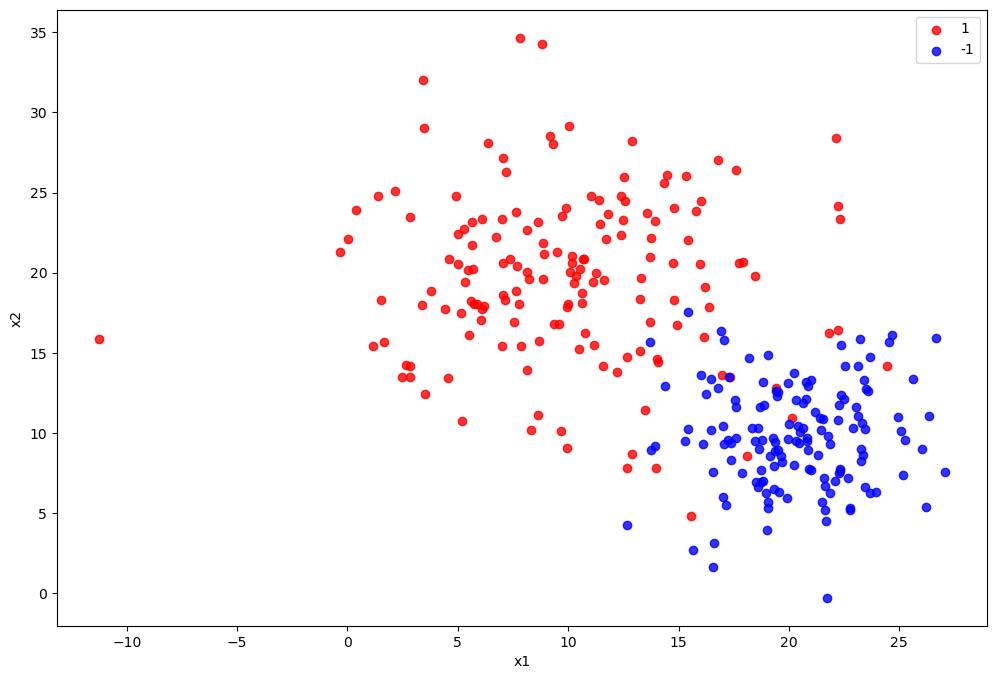

In [97]:
#plotting data
plt.scatter(train_data_p.x1, train_data_p.x2, alpha=0.8, c = p_color, label='1');
plt.scatter(train_data_n.x1, train_data_n.x2, alpha=0.8, c = n_color, label='-1');
plt.legend();
plt.xlabel('x1')
plt.ylabel('x2');

In [98]:
#plot functions
def hw_plot(**kwargs):
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    return fig,ax

def hw_scatter(fig,ax, p, n):
    ax.scatter(p.x1, p.x2, alpha=0.8, c = p_color, label='1');
    ax.scatter(n.x1, n.x2, alpha=0.8, c = n_color, label='-1');
    ax.legend();

def hw_hist(fig, ax, df):
    hb = ax.hist2d(train_data['x1'], train_data['x2'], bins=[100,80], density=True);
    fig.colorbar(hb[3], ax=ax);
    return hb

def hw_hexbin(fig, ax, df, **kwargs):
    hb = ax.hexbin(df['x1'], df['x2'], **kwargs);
    fig.colorbar(hb);
    return hb

In [99]:
#gaussian functions with each class having its sigma
def gaussian_stats(X):
    mu = np.mean(X,0)
    sigma = np.cov(X,rowvar=False)*np.eye(2, dtype = float)
    return mu, sigma
def mv_gaussian_mle_fit(X):
    mu, sigma = gaussian_stats(X)
    return st.multivariate_normal(mu, sigma)
def prob_p_cond_HW(hw): 
    pf = dist_p.pdf(hw)*p_p
    pm = dist_n.pdf(hw)*p_n
    return pf/(pf+pm)



In [100]:
# getting mean and cov for plot
mu_p, cov_p = gaussian_stats(train_data_p[['x1', 'x2']])
mu_n, cov_n = gaussian_stats(train_data_n[['x1', 'x2']])

In [101]:
dist_p = mv_gaussian_mle_fit(train_data_p[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit(train_data_n[['x1', 'x2']])

In [102]:
#class margin
from mchlearn.plotting import grid
p_p = 0.5
p_n = 1- p_p
x1s = np.linspace(-30, 50,100)
x2s = np.linspace(-30,50, 100)

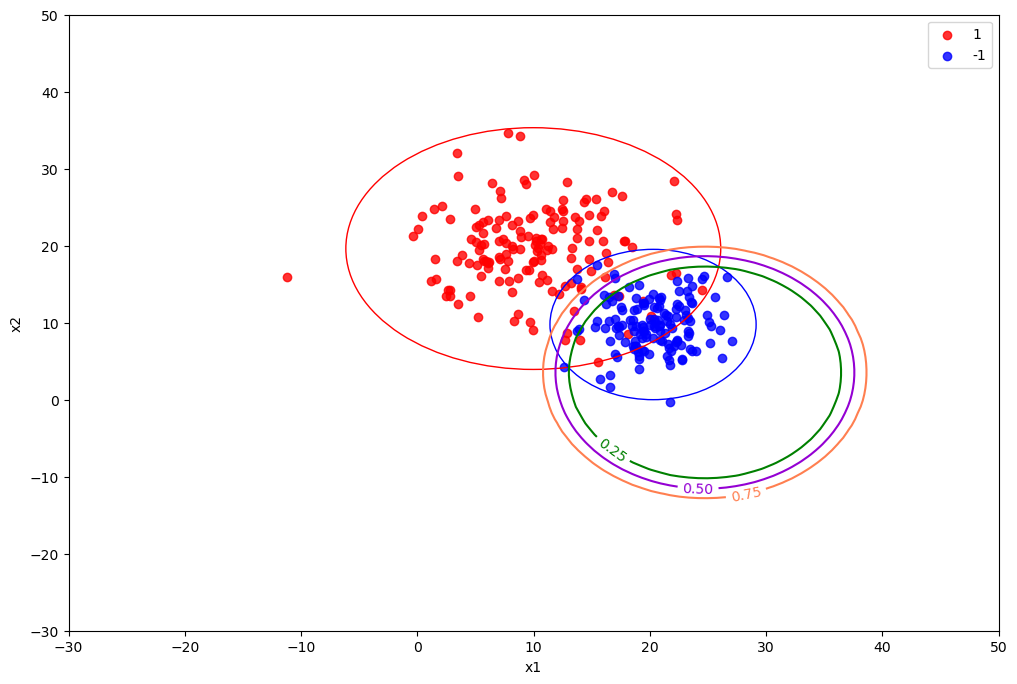

In [103]:
#plotting first graph for part 1 
fig, ax = hw_plot()

hw_scatter(fig, ax, train_data_p, train_data_n)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color);
cs = ax.contour(*grid(x1s,x2s,prob_p_cond_HW),[0.25, 0.5, 0.75],colors=['green','darkviolet', 'coral']);
ax.clabel(cs);

In [104]:
mu_p, cov_p = gaussian_stats2(train_data_p[['x1', 'x2']])
mu_n, cov_n = gaussian_stats2(train_data_n[['x1', 'x2']])

In [105]:
dist_p = mv_gaussian_mle_fit2(train_data_p[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit2(train_data_n[['x1', 'x2']])

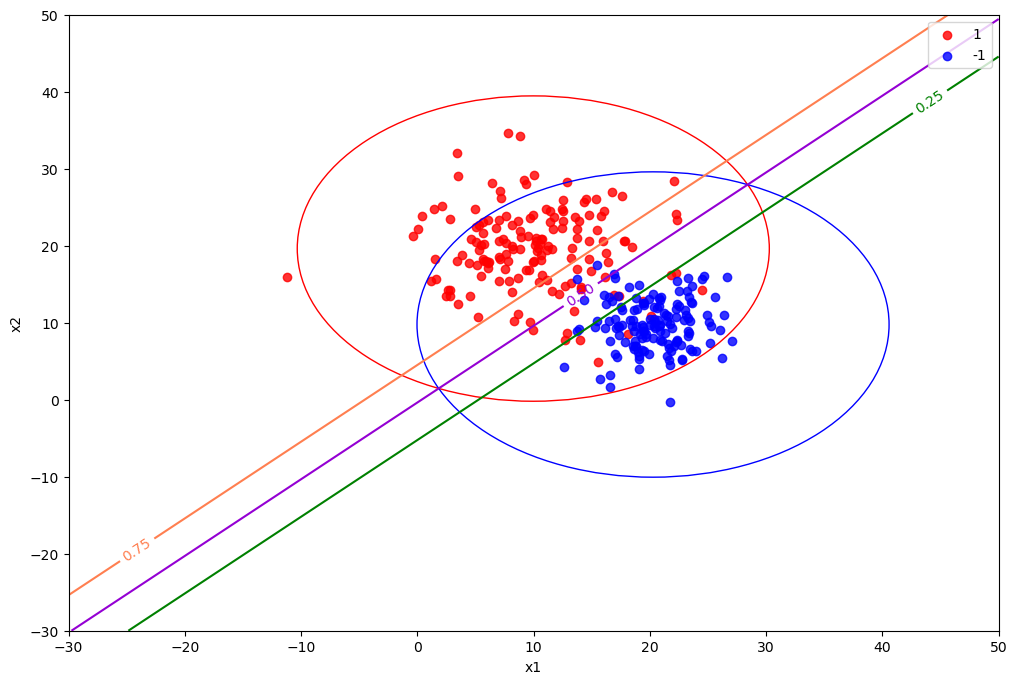

In [106]:
#plotting secound graph for part 1 
fig, ax = hw_plot()

hw_scatter(fig, ax, train_data_p, train_data_n)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color);
cs = ax.contour(*grid(x1s,x2s,prob_p_cond_HW),[0.25, 0.5, 0.75],colors=['green','darkviolet', 'coral']);
ax.clabel(cs);

# Report

## We notice that the decision boundry still good and low errors 

# Part 2

In [107]:
def gaussian_stats2(X):
    mu = np.mean(X,0)
    sigma = np.array(train_data[['x1', 'x2']].cov())
    return mu, sigma*np.eye(2, dtype = float)
def mv_gaussian_mle_fit2(X):
    mu, sigma = gaussian_stats2(X)
    return st.multivariate_normal(mu, sigma)


In [108]:
#reading part 2 data
data = pd.read_csv('binclassv2.txt')
data.columns = ["x1", "x2", "y"]
train_data, test_data  = train_test_split(data,test_size=0.25, random_state=1)

In [109]:
train_data_p = train_data[train_data.y==1]
train_data_n = train_data[train_data.y==-1]
test_data_p = test_data[test_data.y==1]
test_data_n = test_data[test_data.y==-1]

In [110]:
mu_p, cov_p = gaussian_stats(train_data_p[['x1', 'x2']])
mu_n, cov_n = gaussian_stats(train_data_n[['x1', 'x2']])

In [111]:
dist_p = mv_gaussian_mle_fit(train_data_p[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit(train_data_n[['x1', 'x2']])

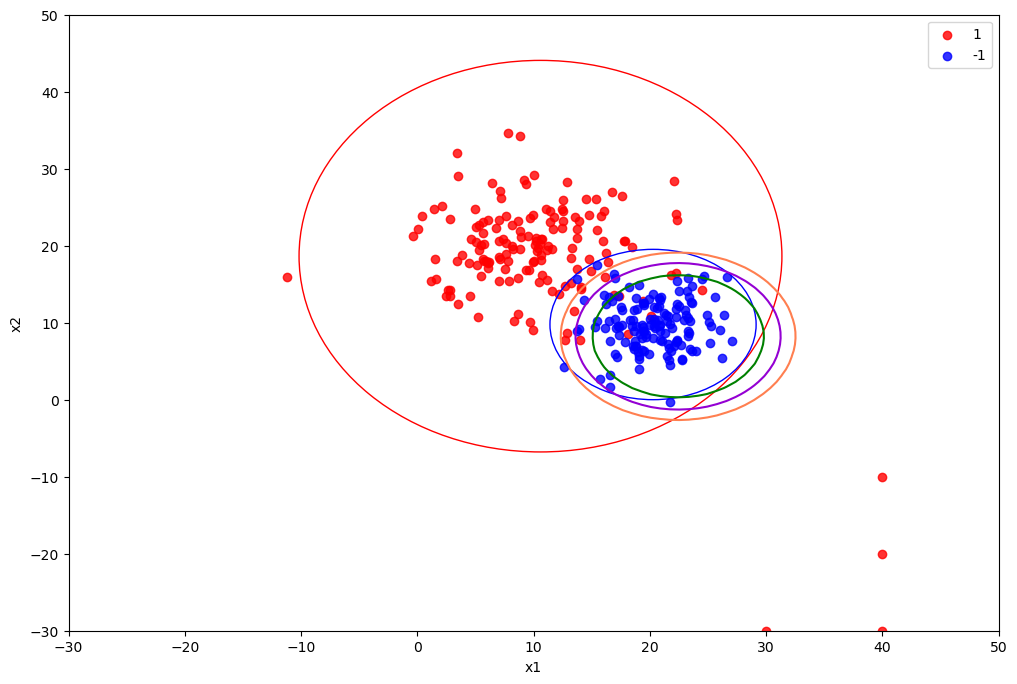

In [112]:
fig, ax = hw_plot()
hw_scatter(fig, ax, train_data_p, train_data_n)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color);

ax.clabel(cs);
cs = ax.contour(*grid(x1s,x2s,prob_p_cond_HW),[0.25, 0.5, 0.75],colors=['green','darkviolet', 'coral']);

In [113]:
mu_p, cov_p = gaussian_stats2(train_data_p[['x1', 'x2']])
mu_n, cov_n = gaussian_stats2(train_data_n[['x1', 'x2']])

In [114]:
dist_p = mv_gaussian_mle_fit2(train_data_p[['x1', 'x2']])
dist_n = mv_gaussian_mle_fit2(train_data_n[['x1', 'x2']])

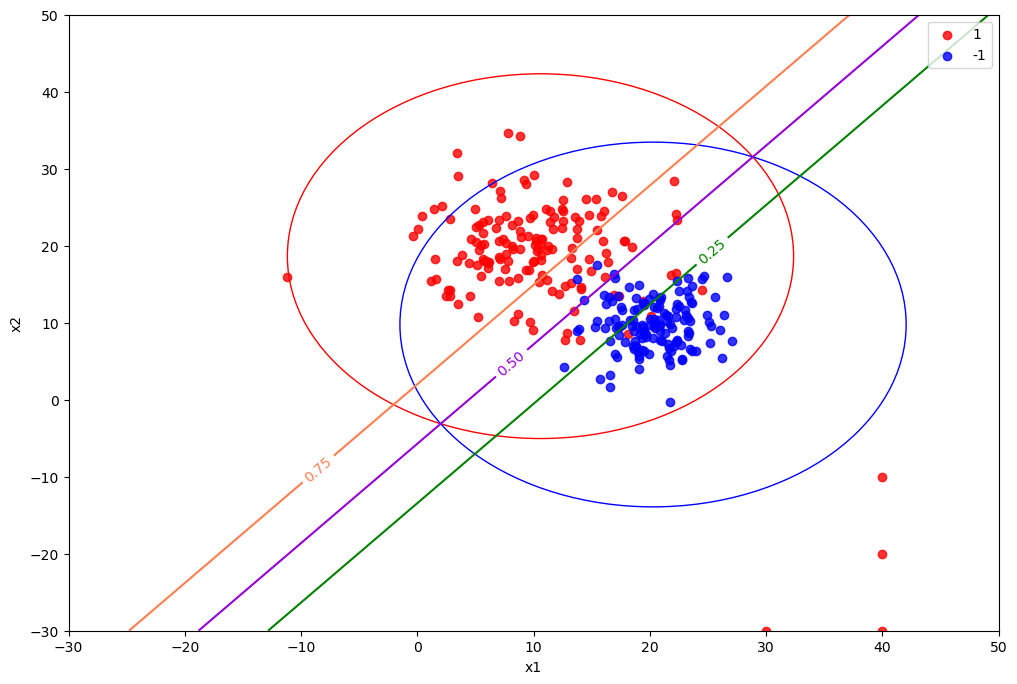

In [115]:
fig, ax = hw_plot()

hw_scatter(fig, ax, train_data_p, train_data_n)
confidence_ellipse(mu_p, cov_p, ax, edgecolor = p_color)
confidence_ellipse(mu_n, cov_n, ax, edgecolor = n_color);
cs = ax.contour(*grid(x1s,x2s,prob_p_cond_HW),[0.25, 0.5, 0.75],colors=['green','darkviolet', 'coral']);
ax.clabel(cs);

# Report

## We notice that the decision boundry is worse and got many errors bottom right